## <div class="alert alert-block alert-info"><b>Project:</b> Green Concrete Design</div>

# About the project


**Background:**  Developing economical and ecofriendly concrete mixes that reduce the carbon footprint with as little Portland cement as possible while meeting workability, strength and durability requirements is critical. There are numerous concrete mix design methods available around the world, including those developed by the American Concrete Institute (ACI) and the British Department of Energy (DOE). Some countries have their own standards or nationally recommended methods, while others lack normative agreement. The majority of the standard methods are analytical in nature with experimental components. This means that the analytically calculated proportion of the concrete mix constituents must be validated by trial mixes and the proportions adjusted accordingly until a satisfactory mix is obtained. This iterative process is costly, consuming time and natural resources, as it involves destructive laboratory testing to ensure the required strength is achieved, typically at 28 days of age. In addition, due to the fact that many of the materials used to produce green concrete, including of  supplementary cementitious materials (SCMs), are variable in many ways, and many of their properties cannot be quantified, it is difficult to design optimal sustainable concrete using the traditional approach. So, in order to define the optimal combinations, an intelligent guess based on the predefined relationships must be made at some point. This leads to the practice of overdesigning concrete properties as a precautionary measure for fear of failing to provide the required properties by adding more cement, thereby emitting more $CO_2$ into the environment. Because conventional concrete mix design is a complex approach, it often requires designers to have in-depth knowledge and extensive experience in concrete science. In addition, these experimental-based methods are practical when there is only one parameter to optimize, such as comprehensive strength. In most cases, however, several factors describing various important properties (e.g. workability and durability) must be considered simultaneously. This will result in an exponential increase in the number of concrete samples prepared. All of these constraints necessitate the use of a dependable, quick, simple, and low-cost method that allows engineers to design sustainable concrete with fewer processes. 

**Aim:** The aim of this project is to develop a data-driven model that is robust, reliable, fast, and cost effective for designing green concrete mixes that reduce the carbon footprint while meeting the desired strength and durability requirements.

**Data:** The raw dataset used in this project was originally created to develop data-driven non-steady-state migration coefficients prediction models. The data were collected from i) research projects and ii) internationally published journal articles by accessing the databases Web of Science and Scopus. The dataset contains twenty-three features that describe the mix ingredients as well as the properties of fresh and hardened concrete. 


# Raw Dataset

The raw dataset retained information concerning the concrete mix, its fresh and hardened properties. The concrete mix comprises eight features describing the ingredients type and proportion. These are w/b ratio, contents of binders: cement, slag, FA, SF, and lime filler (unit of $kg/m^3$), amount of fine, coarse, and total aggregates (unit of $kg/m^3$), contents of chemical admixtures: plasticizers, superplasticizers, and air-entraining agents (AEA) in ($\%$ $by$ $binder$ $wt.$). The fresh and hardened properties describe different properties of the concrete specimens. The fresh concrete properties comprise tests of slump and slump flow (unit of $mm$) to describe the workability of the concrete; air content (in $\%$); as well as fresh and dry density (unit of $kg/m^3$). The hardened concrete property test includes test results of comprehensive strength (unit of $MPa$) and non-steady-state migration coefficients (unit of $x10-12 m^2/s$) performed at different maturity ages. The following Table describes the data in greater detail. 

Feature category |No.|Feature subcategory |Description |Unit
-|-|-|-|-
Concrete mix ingredients  |1| Cement types |-|[-]
|2|Water content | - | [kg/m3] 
|3|Cement content  | - | [kg/m3] 
|4|Mineral admixtures content  | Slag | [kg/m3] 
|5| | Fly ash  | [kg/m3] 
|6| | Silica fume | [kg/m3] 
|7| | Lime filler  | [kg/m3] 
|8|Water-to-binder ratio | - | [-]
|9|Aggregates content | Fine aggregate  | [kg/m3] 
|10| | Coarse aggregate  | [kg/m3] 
|11| | Total aggregate | [kg/m3] 
|12|Chemical admixtures content  | Plasticizer | [% by binder wt.]
|13| |Superplasticizer  | [% by binder wt.]
|14| | Air-entraining agent  | [% by binder wt.]
Fresh concrete properties |15| Basic properties |Slump| [mm]
|16| | Spread  |[mm]
|17| | Air content | [-]
|18| | Fresh density  | [kg/m3] 
|19| | Dry density | [kg/m3] 
Hardened concrete properties |20|Mechanical properties |Compressive strength| [MPa]
|21| | Concrete age at compressive strength test |[days]
 |22|Migration properties  |Concrete age at migration test| [days]
 |23| |Migration coefficient $(D_{nssm})$ | [x10-12 m2/s]

# Method

In this project, five state-of-the-art decision tree-based ensemble methods: **Bagging**, **Random Forest**, **AdaBoost**, **Gradient Boosting**, and **XGBoost** are used.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import math
import os
import scipy as sp
from scipy.stats import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

# Retrive the data

In [2]:
# Import the raw data
df = pd.read_excel('RawData.xlsx')
df.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Fine aggregate,Coarse aggregate,...,Comp. str. test age,Compressive strength,Air content,Spreed,Slump,Fresh density,Dry density,Migration test age,Dnssm,Migration resistance
0,0.45,180.0,NaN,400.0,0.0,0.0,0.0,0.0,640.0,960.0,...,126.0,63.22,NaN,NaN,NaN,NaN,NaN,120,2.85,Very high
1,0.45,180.0,NaN,380.0,0.0,0.0,20.0,0.0,640.0,960.0,...,126.0,63.46,NaN,NaN,NaN,NaN,NaN,120,1.75,Extremely high
2,0.45,180.0,NaN,360.0,0.0,0.0,40.0,0.0,640.0,960.0,...,126.0,70.88,NaN,NaN,NaN,NaN,NaN,120,0.90,Extremely high


# Data Exploration 

In [3]:
# check the size of the dataframe 
df.shape

(843, 24)

In [4]:
# Check number of nan
df.isnull().sum().sum() 

4818

There are 24 features that represent the proportion of concrete mix ingredients, fresh and hardened properties. Because the goal of this work is to optimize the concrete mix by considering its strength and resistance to chloride penetration, only certain features that describe the concrete mix and the two properties will be considered. 

# Preprocessing 

In [5]:
# Remove unnecessary features from the DataFrame
df_Mix_Pro = df.drop(columns =['Fine aggregate', 'Coarse aggregate', 'Air content', 'Spreed','Slump',
                               'Fresh density','Dry density','Migration resistance'])
df_Mix_Pro.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Comp. str. test age,Compressive strength,Migration test age,Dnssm
0,0.45,180.0,NaN,400.0,0.0,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,126.0,63.22,120,2.85
1,0.45,180.0,NaN,380.0,0.0,0.0,20.0,0.0,1600.0,0.0,0.0,0.0,126.0,63.46,120,1.75
2,0.45,180.0,NaN,360.0,0.0,0.0,40.0,0.0,1600.0,0.0,0.0,0.0,126.0,70.88,120,0.90


### Handling of missed data

In [6]:
# Check number of nan
df_Mix_Pro.isnull().sum().sum() 

1517

In [7]:
# Drop all rows with NaN values and reset index after drop
df_Mix_Pro = df_Mix_Pro.dropna().reset_index(drop=True)
df_Mix_Pro.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Comp. str. test age,Compressive strength,Migration test age,Dnssm
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,28.0,47.7,28,17.0
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,0.0,1754.366,0.0,0.0,0.0,28.0,44.5,28,14.2
2,0.55,192.5,CEM II/A-V,297.5,0.0,52.5,0.0,0.0,1749.184,0.0,0.0,0.0,28.0,38.6,28,23.3


In [8]:
# Sanity check
df_Mix_Pro.isnull().sum().sum() 

0

In [9]:
# check the size of a dataframe "df_all_ing"
df_Mix_Pro.shape

(216, 16)

Rows that comprise missed observation are removed from the DataFrame and due to this the number of rows dcreased to 216 from 843.

In [10]:
# computes and displays summary statistics for dataframe "df_all_ing"
df_Mix_Pro.describe()

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Lime filler,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Comp. str. test age,Compressive strength,Migration test age,Dnssm
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.430531,175.737572,367.096457,15.119093,50.805093,7.054630,0.0,1632.872251,0.082575,0.524838,0.251542,45.092593,73.205263,71.384259,8.899850
std,0.074846,21.464154,83.408550,50.943563,131.066813,34.259318,0.0,257.919114,0.259103,0.450577,0.977331,31.868345,84.757286,79.308614,6.550693
min,0.300000,122.500000,168.000000,0.000000,0.000000,0.000000,0.0,839.000000,0.000000,0.000000,0.000000,7.000000,18.900000,3.000000,0.744000
25%,0.360000,158.000000,306.000000,0.000000,0.000000,0.000000,0.0,1474.830000,0.000000,0.000000,0.000000,28.000000,42.000000,28.000000,4.987500
50%,0.426960,172.800000,350.000000,0.000000,0.000000,0.000000,0.0,1721.500000,0.000000,0.552000,0.000000,28.000000,50.500000,28.000000,7.100000
75%,0.450000,190.000000,440.000000,0.000000,57.000000,0.000000,0.0,1827.000000,0.000000,0.838500,0.000000,67.500000,61.225000,91.000000,10.570000
max,0.651786,270.000000,525.000000,312.300000,735.000000,468.500000,0.0,1950.000000,0.894737,2.540000,6.500000,180.000000,483.000000,365.000000,54.000000


The concrete ages at which the comprehensive strength and migration coefficients were measured range from 7 to 216 and 3 to 216 days, respectively. Comprehensive strength and migration coefficients taken at the age of 28 days are commonly used as indicators, as 28 days is considered sufficient. 

In [11]:
# Select comprehensive strength and migration coefficients taken at the age of 28 days
df_Mix_Pro = df_Mix_Pro.loc[(df_Mix_Pro ['Comp. str. test age'] == 28) & (df_Mix_Pro['Migration test age'] == 28)]

Keeping the features "Comp. str. test age" and "Migration test age" now has less meaning and shall be removed. 

In [12]:
# Remove the features "Comp. str. test age" and "Migration test age"
df_Mix_Pro = df_Mix_Pro.drop(columns=['Comp. str. test age','Migration test age'])
df_Mix_Pro.head(2)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,0.0,1754.366,0.0,0.0,0.0,44.5,14.2


In [13]:
df_Mix_Pro.shape

(90, 14)

The total number of rows and columns in the dataframe decreases noticeably. The number of rows is decreased to 90, and the number of columns is decreased to 14. 

### Data exploration through visualization 

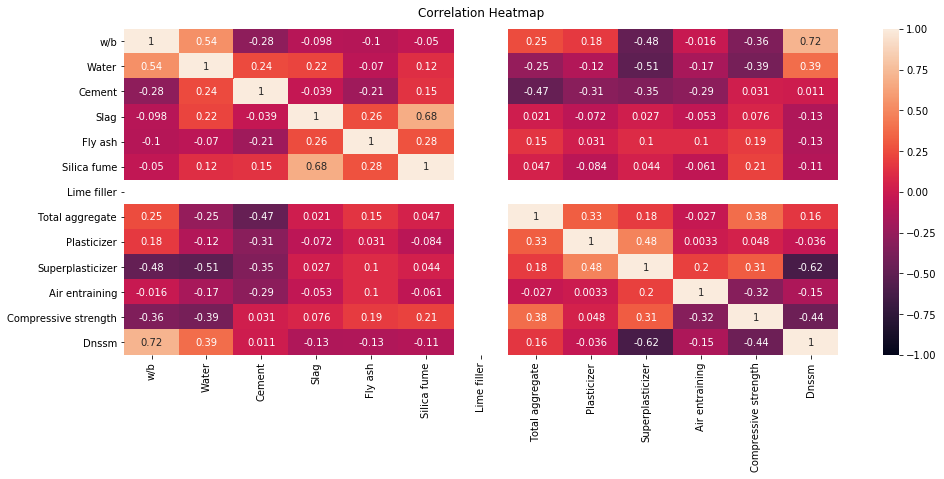

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_Mix_Pro.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
# Write the prediction in an Excel sheet to visualize with another tool.
df_Mix_Pro.to_excel("df_Mix_Pro.Corr.xlsx",sheet_name='Corr')  

The heat map shows that the feature (Lime filler) has only zero values after all NaN are removed from the dataframe.
As a result, these feature is irrelevant to the analysis.





In [16]:
# Remove the feature "Lime filler"
df_Mix_Pro = df_Mix_Pro.drop(columns=['Lime filler'])
df_Mix_Pro.head(2)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,44.5,14.2


### Outlier detection 

Adoption of the multivariate outlier detection method is essential to identify situations in which two or more features have an uncommon combination of scores. Let's apply Mahalanobis distance to detect outliers.

Before applying Mahalanobis distance, features with nonnumeric values must be removed from the dataframe.

In [17]:
# Remove feature with nonnumeric values
df_Mix_Pro1 = df_Mix_Pro.drop(columns=['Cement type'])
df_Mix_Pro1.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm
0,0.55,192.5,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0
1,0.55,192.5,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,44.5,14.2


In [18]:
#Define a function to calculate Mahalanobis Distance.
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

Let us compute Mahalanobis distances with "Compressive strength" and "Dnssm" as target features.



In [19]:
# Input features and Compressive strength as a target feature 
df_Mix_Pro_comp_str = df_Mix_Pro1.drop(columns=['Dnssm'], axis=1)
df_Mix_Pro_comp_str.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength
0,0.55,192.5,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7
1,0.55,192.5,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,44.5


In [20]:
# Input features and Dnssm as a target feature 
df_Mix_Pro_Dnssm = df_Mix_Pro1.drop(columns=['Compressive strength'], axis=1)
df_Mix_Pro_Dnssm.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Dnssm
0,0.55,192.5,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,17.0
1,0.55,192.5,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,14.2


In [21]:
# Mahalanobis distances considering "Compressive strength"  as a traget feature
df_Mix_Pro1['Mahal. Dis. comp. str.'] = mahalanobis(x=df_Mix_Pro_comp_str, data=df_Mix_Pro_comp_str)

# Mahalanobis distances considering "Dnssm"  as a traget feature
df_Mix_Pro1['Mahal. Dis. Dnssm'] = mahalanobis(x=df_Mix_Pro_Dnssm, data=df_Mix_Pro_Dnssm)

# Replace the feature "cement type" in the dataframe
df_Mix_Pro1['Cement type']= df_Mix_Pro['Cement type']
df_Mix_Pro1.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm,Mahal. Dis. comp. str.,Mahal. Dis. Dnssm,Cement type
0,0.55,192.5,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0,5.803145,5.688402,CEM I
1,0.55,192.5,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,44.5,14.2,5.082569,6.131835,CEM II/A-D


In [22]:
# write df_all_ing1 into excel to visualize mahalanobis distances with another tool.
df_Mix_Pro1.to_excel("df_Mix_Pro1_Mahal.xlsx")  

The crucial value at a 0.0001 significance level and 10 degrees of freedom is computed as follows, assuming the test statistic is chi-square distributed with 'n' degrees of freedom. This means that any instance is considered a multivariate outlier if the probability associated with its Mahalanobis distance is 0.0001. 

In [23]:
# Select outlier instances (the  probability associated with  Mahalanobis distance of Compressive strength is 0.0001) 
df_Mix_Pro1[df_Mix_Pro1['Mahal. Dis. comp. str.'] > chi2.ppf((1-0.0001), df=10)]

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm,Mahal. Dis. comp. str.,Mahal. Dis. Dnssm,Cement type
24,0.3867,157.0,244.0,0.0,162.0,0.0,1606.00,0.0,1.108374,6.5,43.0,1.58,38.309099,35.960941,CEM I
101,0.4000,208.3,520.6,312.3,442.5,468.5,1574.10,0.0,0.400000,0.0,60.4,8.56,84.377825,84.808499,CEM I
102,0.4000,208.3,312.3,208.2,0.0,0.0,1574.10,0.0,0.200000,0.0,51.9,5.13,43.596891,42.612603,CEM I
136,0.4500,158.0,350.0,0.0,735.0,0.0,1848.53,0.0,0.000000,0.0,65.8,11.50,41.574443,42.252355,CEM I
141,0.3500,158.0,450.0,0.0,732.0,0.0,1761.53,0.0,0.266497,0.0,76.2,5.70,42.138107,42.047872,CEM I


In [24]:
# Select outlier instances (the  probability associated with  Mahalanobis distance of Dnssm is 0.0001) 

df_Mix_Pro1[df_Mix_Pro1['Mahal. Dis. Dnssm'] > chi2.ppf((1-0.0001), df=10)]

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm,Mahal. Dis. comp. str.,Mahal. Dis. Dnssm,Cement type
24,0.3867,157.0,244.0,0.0,162.0,0.0,1606.00,0.0,1.108374,6.5,43.0,1.58,38.309099,35.960941,CEM I
101,0.4000,208.3,520.6,312.3,442.5,468.5,1574.10,0.0,0.400000,0.0,60.4,8.56,84.377825,84.808499,CEM I
102,0.4000,208.3,312.3,208.2,0.0,0.0,1574.10,0.0,0.200000,0.0,51.9,5.13,43.596891,42.612603,CEM I
136,0.4500,158.0,350.0,0.0,735.0,0.0,1848.53,0.0,0.000000,0.0,65.8,11.50,41.574443,42.252355,CEM I
141,0.3500,158.0,450.0,0.0,732.0,0.0,1761.53,0.0,0.266497,0.0,76.2,5.70,42.138107,42.047872,CEM I


It can be noticed that five instances are observed as an outliers from the computed  Mahalanobis distances. These instances shall be removed from the dataframe. 

In [25]:
# Remove the outliers 
df_Mix_Pro_out = df_Mix_Pro1.drop(index=[24,101,102,136,141])

# Remove the Mahalanobis distances from the dataframe
df_Mix_Pro_out = df_Mix_Pro_out.drop(columns=['Mahal. Dis. comp. str.','Mahal. Dis. Dnssm'])

df_Mix_Pro_out.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm,Cement type
0,0.55,192.5,350.0,0.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0,CEM I
1,0.55,192.5,329.0,0.0,0.0,21.0,1754.366,0.0,0.0,0.0,44.5,14.2,CEM II/A-D


In [26]:
df_Mix_Pro_out.shape

(85, 13)

In [27]:
# Examine  the data types of all features considered in the dataframe
df_Mix_Pro_out.dtypes

w/b                     float64
Water                   float64
Cement                  float64
Slag                    float64
Fly ash                 float64
Silica fume             float64
Total aggregate         float64
Plasticizer             float64
Superplasticizer        float64
Air entraining          float64
Compressive strength    float64
Dnssm                   float64
Cement type              object
dtype: object

It can be noticed that the data types of all the features are float except for the feature cement type. The data type of this feature shall be converted from object to category for encoding.


Let's examine all types of unique values in the Cem_type column in the original (raw) and preprocessed datasets.

In [28]:
df['Cement type'].unique()

array([nan, 'CEM I', 'CEM II/A-D', 'CEM II/A-V', 'CEM II/B-V',
       'CEM II/A-L', 'CEM II/B-L', 'CEM II/B-S', 'CEM II/A-M',
       'CEM II/A-LL', 'CEM II/B-M', 'CEM III/A', 'CEM IV/A', 'CEM IV/B',
       'CEM II/A-S', 'CEM III/B'], dtype=object)

In [29]:
df_Mix_Pro_out['Cement type'].unique()

array(['CEM I', 'CEM II/A-D', 'CEM II/A-V', 'CEM II/B-V', 'CEM III/A',
       'CEM II/B-S', 'CEM IV/A'], dtype=object)

Text(0, 0.5, 'Counts')

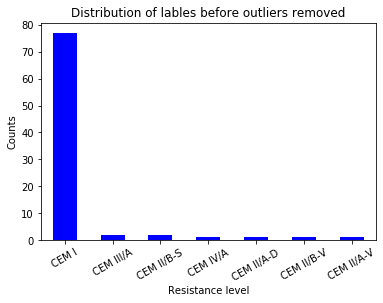

In [30]:
# Visualize the distribution of the lables
color = ['blue']
df_Mix_Pro_out['Cement type'].value_counts().plot(kind='bar', color = color);
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Distribution of lables before outliers removed')
plt.xlabel("Resistance level")
plt.ylabel("Counts")

In the original dataset, there are 15 types of cement types, which can be grouped into five main types (CEM I, CEM II, CEM III, CEM IV, and CEM V). Whereas in the preprocessed data there are only seven types of cement. 

Let's count the number of each type of cement.

In [31]:
Cement_counts =df_Mix_Pro_out['Cement type'].value_counts()
Cement_counts

CEM I         77
CEM III/A      2
CEM II/B-S     2
CEM IV/A       1
CEM II/A-D     1
CEM II/B-V     1
CEM II/A-V     1
Name: Cement type, dtype: int64

Except for CEM I, the number of cement types is significantly low. Consider only "CEM I" and disregard the other cement types because they do not provide enough information.

In [32]:
# Retain only CEM I in the dataframe 
df_Mix_Pro_out1 = df_Mix_Pro_out[df_Mix_Pro_out['Cement type'] =='CEM I' ]

Let's take a look at how the cleaned data's input features are distributed.


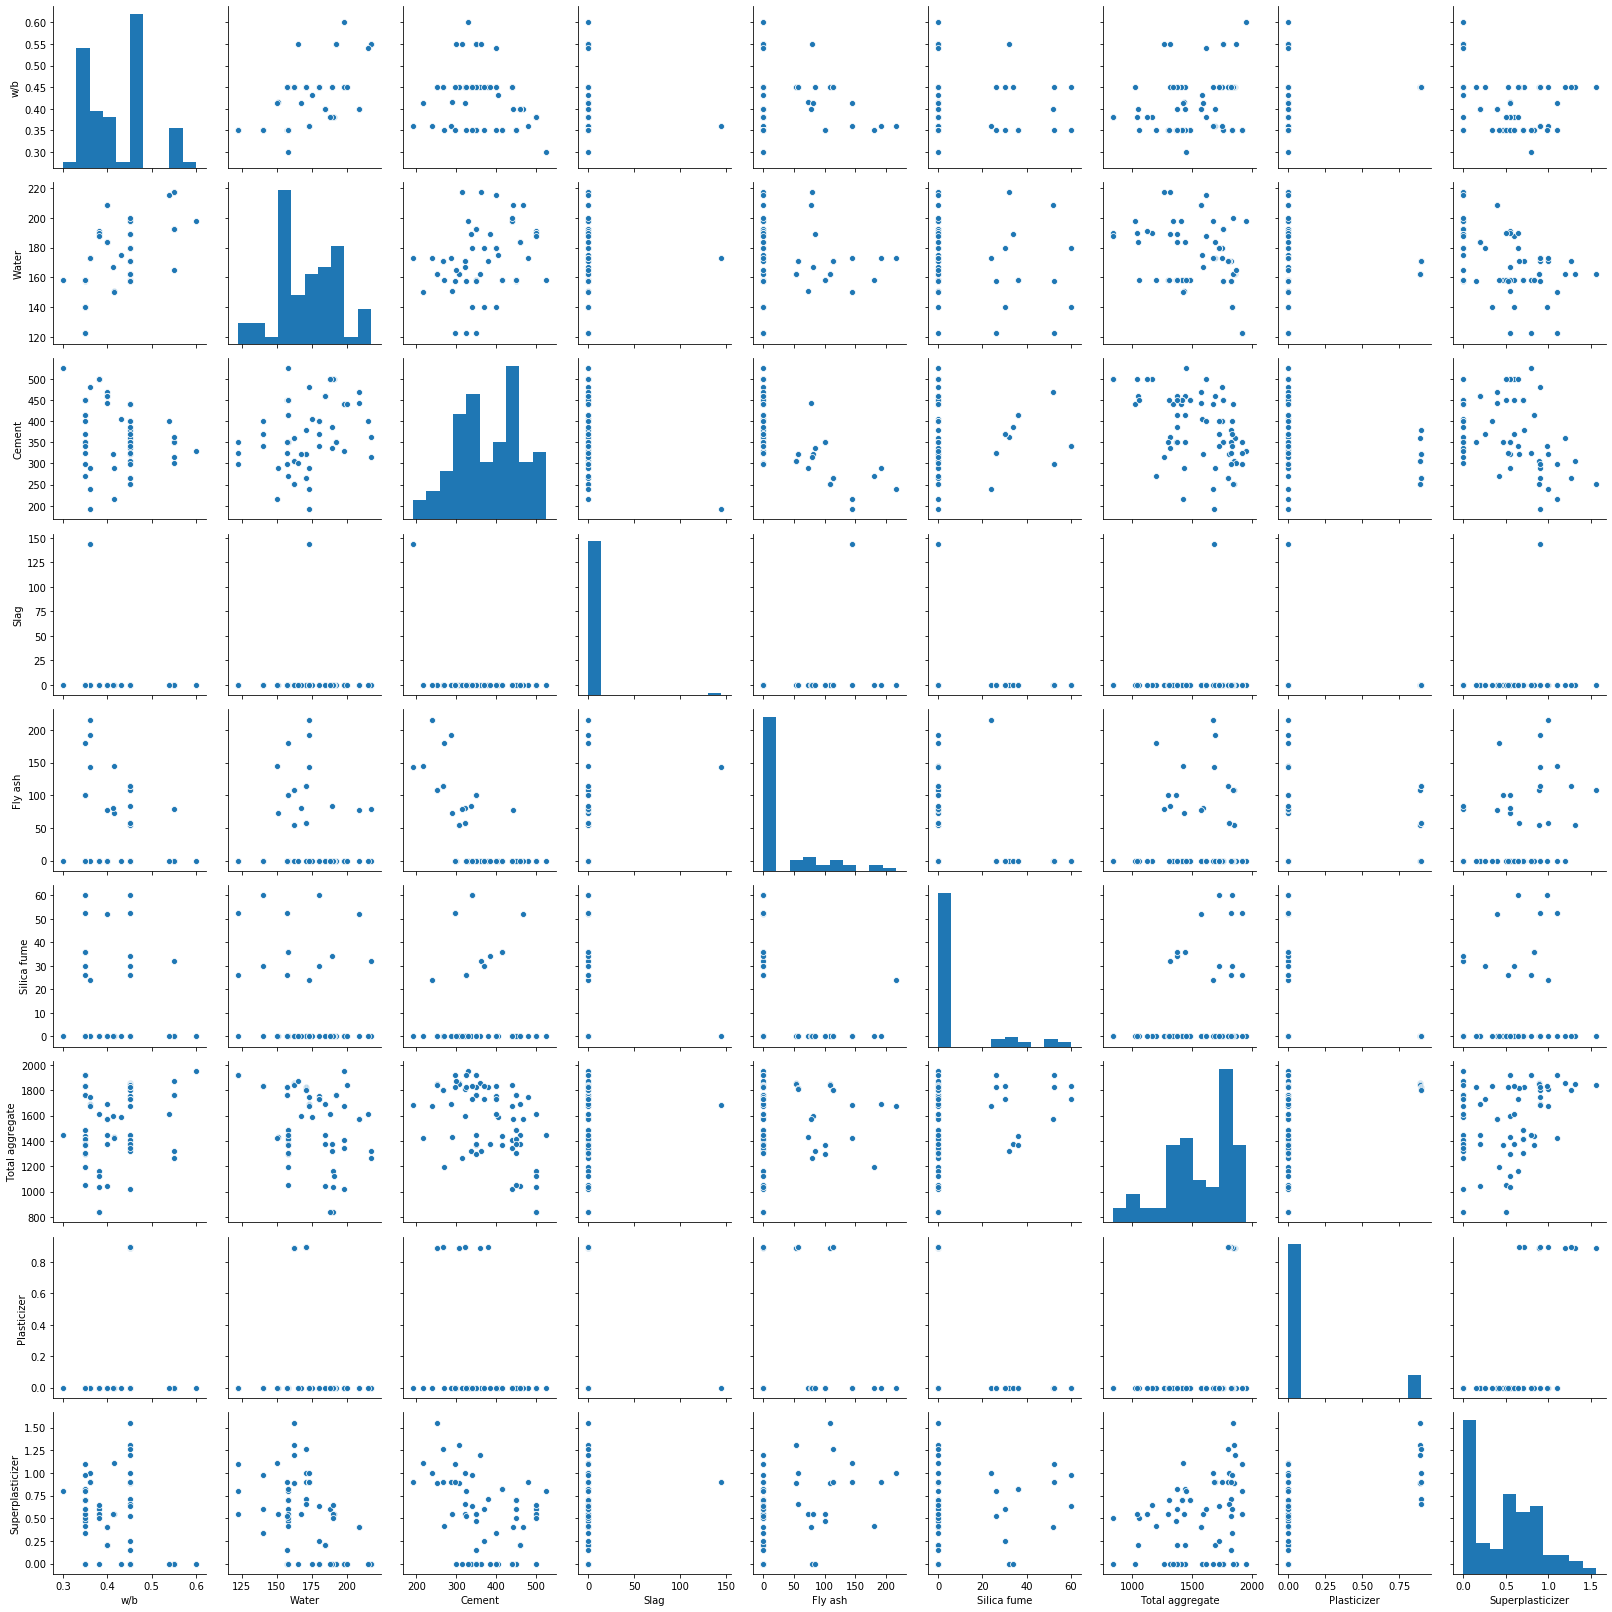

In [33]:
# Select features to be visualize
sns.pairplot(df_Mix_Pro_out1.iloc[:,0:9], height=2.5)
plt.tight_layout()
plt.show()

There are very few instancs of fly ash being used as SCMs. Let us take a closer look.

In [34]:
# Select slag amount greater than 0
df_Mix_Pro_out1[df_Mix_Pro_out1['Slag'] > 0]

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm,Cement type
71,0.36,172.8,192.0,144.0,144.0,0.0,1685.0,0.0,0.9,0.0,50.5,2.217,CEM I


As expected, slag is only used as a partial replacement for cement in one case. So this observation and the feature slag itself shall be removed from the dataset as it can cause a bias.


In [35]:
# Remove the outliers 
df_Mix_Pro_out1 = df_Mix_Pro_out1.drop(index=[71])

In [36]:
# Drop the features 'Cement type' and 'Slag' from the dataframe
df_Mix_Pro_clean = df_Mix_Pro_out1.drop(columns=['Cement type','Slag'])
df_Mix_Pro_clean.head(2)

,w/b,Water,Cement,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm
0,0.55,192.5,350.0,0.0,0.0,1762.237,0.0,0.0,0.0,47.7,17.0
4,0.35,157.5,450.0,0.0,0.0,1762.338,0.0,0.0,0.0,66.1,10.6


In [37]:
df_Mix_Pro_clean.shape

(76, 11)

Let's take a look at how the cleaned data's target features are distributed.

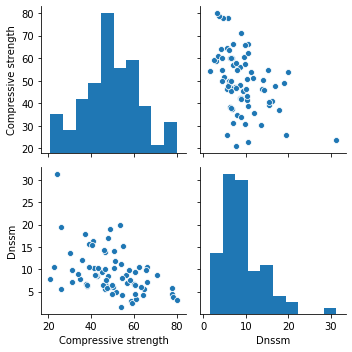

In [38]:
# Select features to be visualize
cols = ['Compressive strength', 'Dnssm']
sns.pairplot(df_Mix_Pro_clean[cols])
plt.tight_layout()
plt.show()

Compressive strength appears to be more evenly distributed than Dnssm.

In [39]:
# reset index
df_Mix_Pro_clean.reset_index(drop=True, inplace=True)

In [40]:
# Write the prediction in an Excel sheet to visualize with another tool.
df_Mix_Pro_clean.to_excel("df_Mix_Pro_clean.xlsx",sheet_name='Clean_data') 

In [41]:
df_Mix_Pro_clean.describe()

,w/b,Water,Cement,Fly ash,Silica fume,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Compressive strength,Dnssm
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.416773,172.085526,384.138158,26.238158,7.257895,1563.900882,0.117344,0.471622,0.235526,49.621053,9.134395
std,0.064500,21.103710,75.451413,51.323822,16.309335,276.554181,0.303467,0.409075,0.893787,13.181677,4.898790
min,0.300000,122.500000,217.000000,0.000000,0.000000,839.000000,0.000000,0.000000,0.000000,21.000000,1.569000
25%,0.350000,158.000000,323.750000,0.000000,0.000000,1376.765000,0.000000,0.000000,0.000000,41.400000,6.075000
50%,0.413865,171.000000,383.000000,0.000000,0.000000,1615.000000,0.000000,0.537222,0.000000,48.800000,7.950000
75%,0.450000,189.000000,450.000000,13.500000,0.000000,1810.750000,0.000000,0.732895,0.000000,58.850000,10.532500
max,0.600000,217.000000,525.000000,216.000000,60.000000,1950.000000,0.894737,1.555556,5.800000,80.000000,31.300000


# Model training

The modeling activity in this work is done with two scenarios in mind: **Scenarios 1 & 2**. **Scenario 1** uses the default hyperparameter settings for multioutput regression. **Scenario 2** takes into account selected hyperparameters identified by considering only one of the target features. The hyperparameters that were identified were then used to fit the multioutput regression.



# Scenario 1 

In [42]:
# Input features
X = df_Mix_Pro_clean.iloc[:,0:-2]

# Target features
y = df_Mix_Pro_clean.iloc[:,-2:]

In [43]:
print ('Input features:',X.shape,'Target features:', y.shape)

Input features: (76, 9) Target features: (76, 2)


In [44]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (60, 9) (60, 2)
Test set: (16, 9) (16, 2)


## XGBoost

In [45]:
# Model
XGB = MultiOutputRegressor(
    XGBRegressor(random_state=42))

# Fit the model
XGB.fit(X_train, y_train)

# Predict on test dataset
y_pred_XGB = XGB.predict(X_test)

# Convert array to DF
y_pred_XGB=pd.DataFrame(y_pred_XGB)

In [46]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_XGB.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_XGB.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_XGB.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 7.602
Mean Squared Error (MSE):  120.331
RMSE: 10.970


In [47]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_XGB.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_XGB.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_XGB.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.949
Mean Squared Error (MSE):  5.595
RMSE: 2.365


# AdaBoost

In [48]:
# Model
ADA= MultiOutputRegressor(
    AdaBoostRegressor(random_state=42))

# Fit the model
ADA.fit(X_train, y_train)

# Predict on test dataset
y_pred_ADA = ADA.predict(X_test)

# Convert array to DF
y_pred_ADA = pd.DataFrame(y_pred_ADA)

In [49]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_ADA.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_ADA.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_ADA.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 8.152
Mean Squared Error (MSE):  120.382
RMSE: 10.972


In [50]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_ADA.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_ADA.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_ADA.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.707
Mean Squared Error (MSE):  5.259
RMSE: 2.293


#  Random Forest

In [51]:
# Model
RF = MultiOutputRegressor(
    RandomForestRegressor(random_state=42))

# Fit the model
RF.fit(X_train, y_train)

# Predict on test dataset
y_pred_RF = RF.predict(X_test)

# Convert array to DF
y_pred_RF = pd.DataFrame(y_pred_RF)

In [52]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_RF.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_RF.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_RF.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 7.254
Mean Squared Error (MSE):  109.144
RMSE: 10.447


In [53]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_RF.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_RF.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_RF.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.765
Mean Squared Error (MSE):  5.948
RMSE: 2.439


#  Gradient Boosting

In [54]:
# Model
GBR = MultiOutputRegressor(
    GradientBoostingRegressor(random_state=42))

# Fit the model
GBR.fit(X_train, y_train)

# Predict on test dataset
y_pred_GBR = GBR.predict(X_test)

# Convert array to DF
y_pred_GBR = pd.DataFrame(y_pred_GBR)

In [55]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_GBR.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_GBR.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_GBR.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 5.918
Mean Squared Error (MSE):  85.930
RMSE: 9.270


In [56]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_GBR.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_GBR.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_GBR.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.546
Mean Squared Error (MSE):  4.695
RMSE: 2.167


# Bagging

In [57]:
# Model
BR = MultiOutputRegressor(
    BaggingRegressor(random_state=42))

# Fit the model
BR.fit(X_train, y_train)

# Predict on test dataset
y_pred_BR = BR.predict(X_test)

# Convert array to DF
y_pred_BR = pd.DataFrame(y_pred_BR)

In [58]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_BR.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_BR.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_BR.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 6.986
Mean Squared Error (MSE):  93.147
RMSE: 9.651


In [59]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_BR.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_BR.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_BR.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.756
Mean Squared Error (MSE):  6.934
RMSE: 2.633


In [60]:
# rest index of y_test
y_test.reset_index(drop=True, inplace=True)

# Measured and predicted comprehensive strength values 
Pred_CS_S1 = pd.concat([y_test.iloc[:,0], y_pred_XGB.iloc[:,0],  y_pred_ADA.iloc[:,0], y_pred_RF.iloc[:,0], 
                        y_pred_GBR.iloc[:,0], y_pred_BR.iloc[:,0]], axis = 1)
Pred_CS_S1.columns = ['Measured', 'XGBoost','AdaBoost','Random Forest','Gradient Boosting','Bagging']

## Measured and predicted Dnssm values 
Pred_Dnssm_S1 = pd.concat([y_test.iloc[:,1], y_pred_XGB.iloc[:,1],  y_pred_ADA.iloc[:,1], y_pred_RF.iloc[:,1],
                           y_pred_GBR.iloc[:,1], y_pred_BR.iloc[:,1]], axis = 1)
Pred_Dnssm_S1.columns = ['Measured', 'XGBoost','AdaBoost','Random Forest','Gradient Boosting','Bagging']
Pred_CS_S1.head(2)

,Measured,XGBoost,AdaBoost,Random Forest,Gradient Boosting,Bagging
0,35.9,66.099648,64.378947,61.920783,63.647335,62.85
1,41.5,39.373569,45.164000,41.426000,44.634021,44.81


Write the prediction in an Excel spreadsheet to visualize it with another tool.

In [61]:
# Write the prediction in an Excel sheet.
Pred_CS_S1.to_excel("Pred_CS_S1.xlsx",sheet_name='Pred_CS_S1')  
Pred_Dnssm_S1.to_excel("Pred_Dnssm_S1.xlsx",sheet_name='Pred_Dnssm_S1')  

# Senario 2





Let's prepare input features and one target feature, then train the model to find the best hyperparameters for higher prediction accuracy. The identified hyperparameters will then be used to train the model to predict multiple targets.


In [62]:
# Select input features
X1 = df_Mix_Pro_clean.iloc[:,0:-2]

# Select one taget feature
y1 = df_Mix_Pro_clean.iloc[:,-2]

In [63]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=42)

print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (60, 9) (60,)
Test set: (16, 9) (16,)


# XGBoost Optimized

In [64]:
# Prepare and train a model and identify best hyperparameters based on a single target feature

xgb = XGBRegressor()

## grid search to find the best model parameter

param_grid = {
        'n_estimators': [20, 50, 100, 300,500],
        'max_depth': [2, 4, 6, 8, 10],
        'gamma': [0.0001, 0.001, 0.01],
        'learning_rate': [0.001, 0.01, 0.1, 0.3],
        'booster': ['gbtree']
    }

grid_search_model = GridSearchCV(xgb, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model.fit(X_train1, y_train1)

print(f'Best Score: {grid_search_model.best_score_}')
print(f'Best Param: {grid_search_model.best_params_}')

Best Score: 0.5322806759199009
Best Param: {'booster': 'gbtree', 'gamma': 0.0001, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}


In [65]:
# Train multi-targets using the identified hyperprameters.

xgb_multi = MultiOutputRegressor(
    XGBRegressor(booster= 'gbtree', gamma= 0.0001, learning_rate= 0.01, 
                 max_depth= 2, n_estimators= 500, random_state=42)
)

xgb_multi.fit(X_train, y_train)

# Predict on test dataset
y_pred_xgb_multi = xgb_multi.predict(X_test)

# Convert array to DF
y_pred_xgb_multi=pd.DataFrame(y_pred_xgb_multi)

In [66]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_xgb_multi.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_xgb_multi.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_xgb_multi.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 6.264
Mean Squared Error (MSE):  73.890
RMSE: 8.596


In [67]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_xgb_multi.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_xgb_multi.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_xgb_multi.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.588
Mean Squared Error (MSE):  4.781
RMSE: 2.186


# AdaBoost Optimized

In [68]:
# Prepare and train a model and identify best hyperparameters based on a single target feature

adbr = AdaBoostRegressor()
## grid search to find the best model parameters

parameters_adbr={'learning_rate':[0.05,0.1,0.2,0.6,0.8,1],
                'n_estimators': [50,60,100],
                'loss' : ['linear', 'square', 'exponential']}

grid_search_adbr=GridSearchCV(adbr, param_grid=parameters_adbr,cv=5,n_jobs = -1, verbose=3)
grid_search_adbr.fit(X_train1, y_train1)

print(f'Best Score: {grid_search_adbr.best_score_}')
print(f'Best Param: {grid_search_adbr.best_params_}')


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.6s


Best Score: 0.5173273853169242
Best Param: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 60}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   12.3s finished


In [69]:
# Train multi-targets using the identified hyperprameters.

adbr_multi = MultiOutputRegressor(
    AdaBoostRegressor(learning_rate = 1, loss = 'exponential', n_estimators = 60, random_state=42)
)

adbr_multi.fit(X_train, y_train)

# Predict on test dataset
y_pred_adbr_multi = adbr_multi.predict(X_test)

# Convert array to DF
y_pred_adbr_multi = pd.DataFrame(y_pred_adbr_multi)

In [70]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_adbr_multi.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_adbr_multi.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_adbr_multi.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 7.727
Mean Squared Error (MSE):  114.646
RMSE: 10.707


In [71]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_adbr_multi.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_adbr_multi.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_adbr_multi.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.612
Mean Squared Error (MSE):  4.644
RMSE: 2.155


# Random Forest Optimized

In [72]:
# Prepare and train a model and identify best hyperparameters based on a single target feature

rf = RandomForestRegressor()

## grid search to find the best model parameter

parameters_rf = {'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features':['auto', 'sqrt', 'log2'],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]}

grid_search_rf = GridSearchCV(rf, param_grid = parameters_rf,cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train1, y_train1)

print(f'Best Score: {grid_search_rf.best_score_}')
print(f'Best Param: {grid_search_rf.best_params_}')


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  6.4min finished


Best Score: 0.4246091787362528
Best Param: {'bootstrap': True, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [73]:
# Train multi-targets using the identified hyperprameters.

rf_multi = MultiOutputRegressor(
    RandomForestRegressor(bootstrap= True, max_depth= 110, max_features= 'log2' , min_samples_leaf= 4,
                          min_samples_split= 8, n_estimators= 100, random_state=42)
)

rf_multi.fit(X_train, y_train)

# Predict on test dataset
y_pred_rf_multi = rf_multi.predict(X_test)

# Convert array to DF
y_pred_rf_multi=pd.DataFrame(y_pred_rf_multi)

In [74]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_rf_multi.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_rf_multi.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_rf_multi.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 8.189
Mean Squared Error (MSE):  122.101
RMSE: 11.050


In [75]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_rf_multi.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_rf_multi.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_rf_multi.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.788
Mean Squared Error (MSE):  5.408
RMSE: 2.325


#  Gradient Boosting Optimize

In [76]:
# Prepare and train a model and identify best hyperparameters based on a single target feature

gbr = GradientBoostingRegressor()

## grid search to find the best model parameter

parameters_gbr = {'max_depth': [3,5,6,7],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 3, 10],
              'min_samples_leaf': [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,30,50,70]}

grid_search_gbr = GridSearchCV(gbr, param_grid=parameters_gbr,cv=5,n_jobs = -1, verbose=3)
grid_search_gbr.fit(X_train1, y_train1)

print(f'Best Score: {grid_search_gbr.best_score_}')
print(f'Best Param: {grid_search_gbr.best_params_}')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 2104 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   55.6s


Best Score: 0.589303248183059
Best Param: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   58.1s finished


In [77]:
# Train multi-targets using the identified hyperprameters.

gbr_multi = MultiOutputRegressor(
    GradientBoostingRegressor(learning_rate=0.2, max_depth=3,max_features='sqrt', min_samples_split=10,
                             min_samples_leaf=1,n_estimators=10, random_state=42)
)

gbr_multi.fit(X_train, y_train)

# Predict on test dataset
y_pred_gbr_multi = gbr_multi.predict(X_test)

# Convert array to DF
y_pred_gbr_multi=pd.DataFrame(y_pred_gbr_multi)

In [78]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_gbr_multi.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_gbr_multi.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_gbr_multi.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 6.683
Mean Squared Error (MSE):  83.369
RMSE: 9.131


In [79]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_gbr_multi.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_gbr_multi.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_gbr_multi.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.363
Mean Squared Error (MSE):  3.712
RMSE: 1.927


# Bagging Optimized

In [80]:
# Prepare and train a model and identify best hyperparameters based on a single target feature

br = BaggingRegressor()

## grid search to find the best model paramete
parameters_br = {'n_estimators': [50,100,200],
              'max_features':[1,2,4,6,8],
              'max_samples': [0.5,0.1],
            'bootstrap': [True, False],
         'bootstrap_features': [True, False]}


grid_search_br = GridSearchCV(br, param_grid=parameters_br,cv=5,n_jobs = -1, verbose=3)
grid_search_br.fit(X_train1, y_train1)

print(f'Best Score: {grid_search_br.best_score_}')
print(f'Best Param: {grid_search_br.best_params_}')


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   34.9s


Best Score: 0.5005995609420992
Best Param: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 8, 'max_samples': 0.5, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   38.1s finished


In [81]:
# Train multi-targets using the identified hyperprameters.

br_multi = MultiOutputRegressor(
    BaggingRegressor(bootstrap = True, bootstrap_features = False, max_features =8,
                     max_samples = 0.5, n_estimators = 50, random_state=42)
)

br_multi.fit(X_train, y_train)

# Predict on test dataset
y_pred_br_multi = br_multi.predict(X_test)

# Convert array to DF
y_pred_br_multi = pd.DataFrame(y_pred_br_multi)

In [82]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,0], y_pred_br_multi.iloc[:,0])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,0], y_pred_br_multi.iloc[:,0])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,0], y_pred_br_multi.iloc[:,0])**(1/2)))

Mean Absolute Error (MAE): 7.099
Mean Squared Error (MSE):  93.311
RMSE: 9.660


In [83]:
print("Mean Absolute Error (MAE): {:.3f}".format(mae(y_test.iloc[:,1], y_pred_br_multi.iloc[:,1])))
print("Mean Squared Error (MSE):  {:.3f}". format(mse(y_test.iloc[:,1], y_pred_br_multi.iloc[:,1])))
print("RMSE: {:.3f}".format(mse(y_test.iloc[:,1], y_pred_br_multi.iloc[:,1])**(1/2)))

Mean Absolute Error (MAE): 1.743
Mean Squared Error (MSE):  6.131
RMSE: 2.476


In [84]:
# rest index of y_test
y_test.reset_index(drop=True, inplace=True)

# Measured and predicted comprehensive strength values 
Pred_CS_S2 = pd.concat([y_test.iloc[:,0], y_pred_xgb_multi.iloc[:,0],  y_pred_adbr_multi.iloc[:,0],
                        y_pred_rf_multi.iloc[:,0], y_pred_gbr_multi.iloc[:,0], y_pred_br_multi.iloc[:,0]], axis = 1)

Pred_CS_S2.columns = ['Measured', 'XGBoost','AdaBoost','Random Forest','Gradient Boosting','Bagging']

## Measured and predicted Dnssm values 
Pred_Dnssm_S2 = pd.concat([y_test.iloc[:,1], y_pred_xgb_multi.iloc[:,1],  y_pred_adbr_multi.iloc[:,1],
                        y_pred_rf_multi.iloc[:,1], y_pred_gbr_multi.iloc[:,1], y_pred_br_multi.iloc[:,1]], axis = 1)

Pred_Dnssm_S2.columns = ['Measured', 'XGBoost','AdaBoost','Random Forest','Gradient Boosting','Bagging']
Pred_CS_S2.head(2)

,Measured,XGBoost,AdaBoost,Random Forest,Gradient Boosting,Bagging
0,35.9,58.426857,64.008333,56.319594,59.096336,57.220
1,41.5,41.047329,42.800000,46.586820,45.260121,43.156


Write the prediction in an Excel spreadsheet to visualize it with another tool.

In [85]:
# Write the prediction in an Excel sheet.
Pred_CS_S2.to_excel("Pred_CS_S2.xlsx",sheet_name='Pred_CS_S2')  
Pred_Dnssm_S2.to_excel("Pred_Dnssm_S2.xlsx",sheet_name='Pred_Dnssm_S2')  

# User Interface Development

In [86]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.
